# TESTs

## Devices

In [5]:
import torch
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'nothing')


nothing


## Evaluate some agents

In [6]:
from rlcard.models.uno_rule_models import UNORuleModelV1
from agent_manager.ruled import UNORuleModelV2
from agent_manager import evaluate_agents
from rlcard.agents import RandomAgent
from rlcard import models
import torch

# Initialiser l'agent basé sur des règles
rule_agent_1 = UNORuleModelV1().agents[0]
rule_agent_2 = UNORuleModelV2().agents[0]

# Chargement d'un modèle DQN
load_checkpoint_path = "trained_models/local/model.pth"
dqn_agent=torch.load(load_checkpoint_path)

# Chargement d'un modèle CFR pré-entrainé
cfr_agent = models.load('leduc-holdem-cfr').agents[0]

# Initialisation d'un agent aléatoire
random_agent = RandomAgent(num_actions=61)

# Évaluer les agents sur 1000 parties
evaluate_agents(dqn_agent, rule_agent_2, num_games=1000)


C:\Users\gcmpr\AppData\Local\Temp\ipykernel_8876\867429172.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dqn_agent=torch.load(load_checkpoint_path)


FileNotFoundError: [Errno 2] No such file or directory: 'trained_models/local/model.pth'

## Test training model

--> Running on the CPU

----------------------------------------
  episode      |  0
  reward       |  0.01
----------------------------------------
INFO - Step 100, rl-loss: 0.23385272920131683
INFO - Copied model parameters to target network.
INFO - Step 1100, rl-loss: 0.137152910232543954
INFO - Copied model parameters to target network.
INFO - Step 2100, rl-loss: 0.17178347706794746
INFO - Copied model parameters to target network.
INFO - Step 2340, rl-loss: 0.14448095858097076
----------------------------------------
  episode      |  100
  reward       |  -0.002
----------------------------------------
INFO - Step 3100, rl-loss: 0.186105608940124545
INFO - Copied model parameters to target network.
INFO - Step 4100, rl-loss: 0.131121858954429634
INFO - Copied model parameters to target network.
INFO - Step 4488, rl-loss: 0.106608450412750247
----------------------------------------
  episode      |  200
  reward       |  0.037
----------------------------------------
INFO - Step 

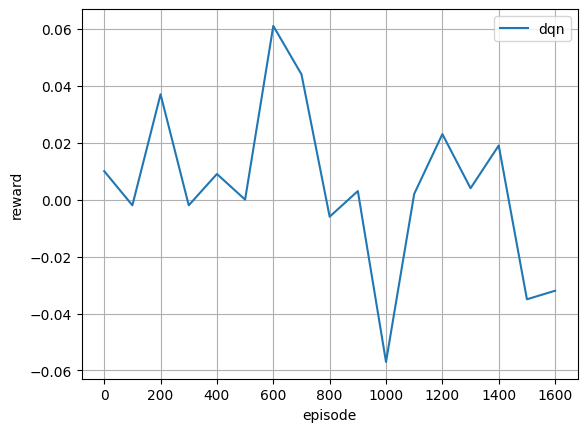

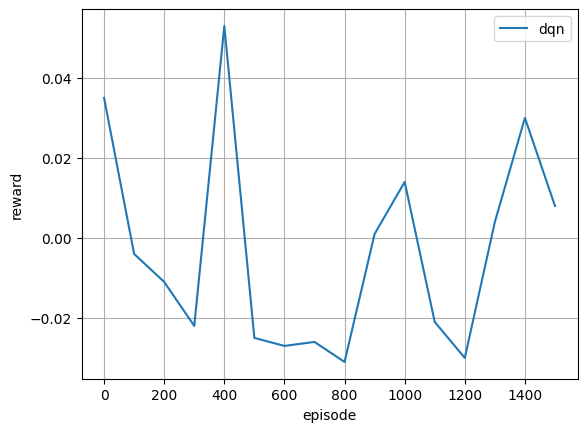

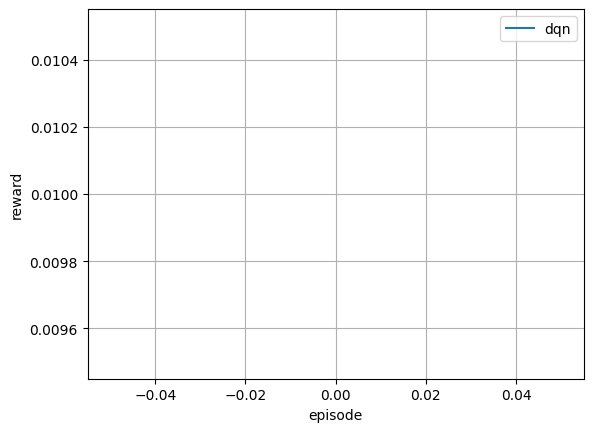

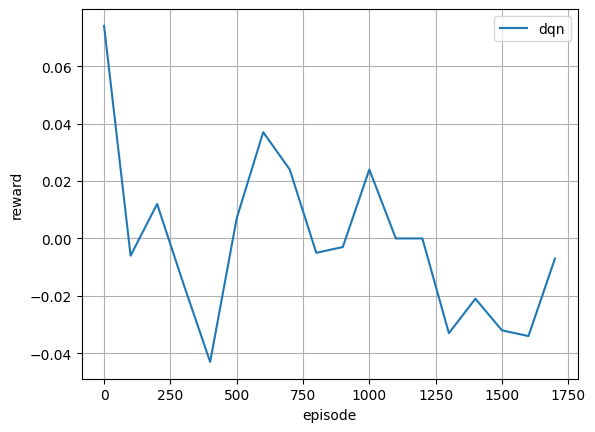

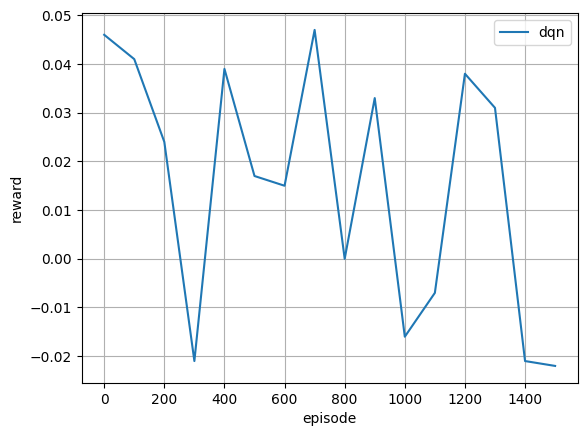

In [16]:
from agent_manager import train

tests_layers = ([32, 32],
                [64, 64],
                [128, 128],
                [32, 32, 32],
                [32, 32, 32, 32])

for i, layers in enumerate(tests_layers):
    train(env_type='uno', algorithm='dqn', seed=42, num_episodes=5000, dir=f'./trained_models/local/{i}', mlp_layers=layers, max_time=300) #, resume_training='model.pth'

comparaison

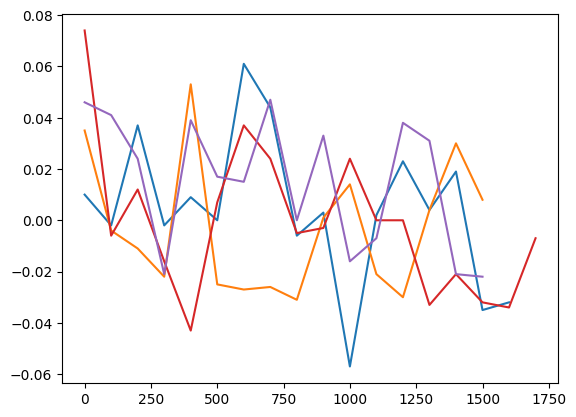

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

for i, _ in enumerate(tests_layers):
    dataset = pd.read_csv(f'./trained_models/local/{i}/performance.csv')

    plt.plot(dataset["episode"], dataset["reward"])

plt.show()

# Remind :

```shell
python3.12 agent_manager --env_type uno --algorithm dqn --num_episode 500 --dir trained_model/local --resume_training model.pth
```